In [1]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [2]:
from fastai import *
from fastai.vision import *

In [3]:
batch_size = 64

In [4]:
!cp /floyd/input/cozmo_images /floyd/home/fastai/data/cozmo_images

cp: cannot stat '/floyd/input/cozmo_images': No such file or directory


In [5]:
from pathlib import Path

In [6]:
path_img = Path('/floyd/home/fastai/data/cozmo_images')

In [7]:
classes = path_img.ls()
classes

[PosixPath('/floyd/home/fastai/data/cozmo_images/plant'),
 PosixPath('/floyd/home/fastai/data/cozmo_images/seltzer'),
 PosixPath('/floyd/home/fastai/data/cozmo_images/toothpaste')]

In [8]:
path = Path('/floyd/home/fastai/data/cozmo_images')

In [9]:
fnames = sorted(Path('/floyd/home/fastai/data/cozmo_images').glob('**/*.jpeg'))

In [10]:
fnames[:5]
    

[PosixPath('/floyd/home/fastai/data/cozmo_images/plant/plant-155.jpeg'),
 PosixPath('/floyd/home/fastai/data/cozmo_images/plant/plant-156.jpeg'),
 PosixPath('/floyd/home/fastai/data/cozmo_images/plant/plant-157.jpeg'),
 PosixPath('/floyd/home/fastai/data/cozmo_images/plant/plant-158.jpeg'),
 PosixPath('/floyd/home/fastai/data/cozmo_images/plant/plant-159.jpeg')]

In [11]:
len(fnames)

657

In [12]:
np.random.seed(2)

In [13]:
pat = r'([^/]+)-\d+.jpeg$'

In [14]:
import re
p = re.compile(pat)
match = p.search('/floyd/input/fastai/data/cozmo_images/plant/plant-155.jpeg').group(1)
print(match)

plant


In [15]:
data = ImageDataBunch.from_name_re(path_img, fnames, pat, ds_tfms=get_transforms(), size=224, bs=batch_size)

In [16]:
data.normalize(imagenet_stats)

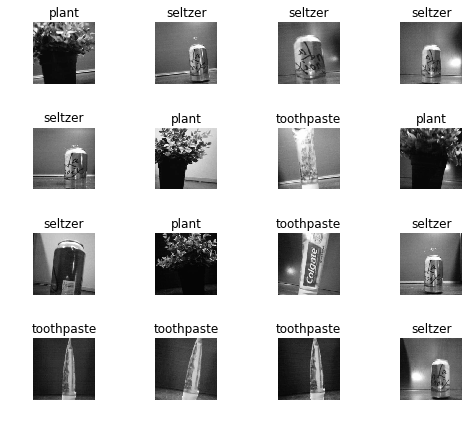

In [17]:
data.show_batch(rows=4, figsize=(7,6))

In [18]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:01<00:00, 77515112.76it/s]


In [19]:
learn.fit_one_cycle(4)

Total time: 01:08
epoch  train_loss  valid_loss  error_rate
1      0.568849    0.047898    0.000000    (00:48)
2      0.265103    0.002417    0.000000    (00:06)
3      0.161812    0.001489    0.000000    (00:06)
4      0.111047    0.000895    0.000000    (00:06)



In [20]:
learn.save('stage-1')

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

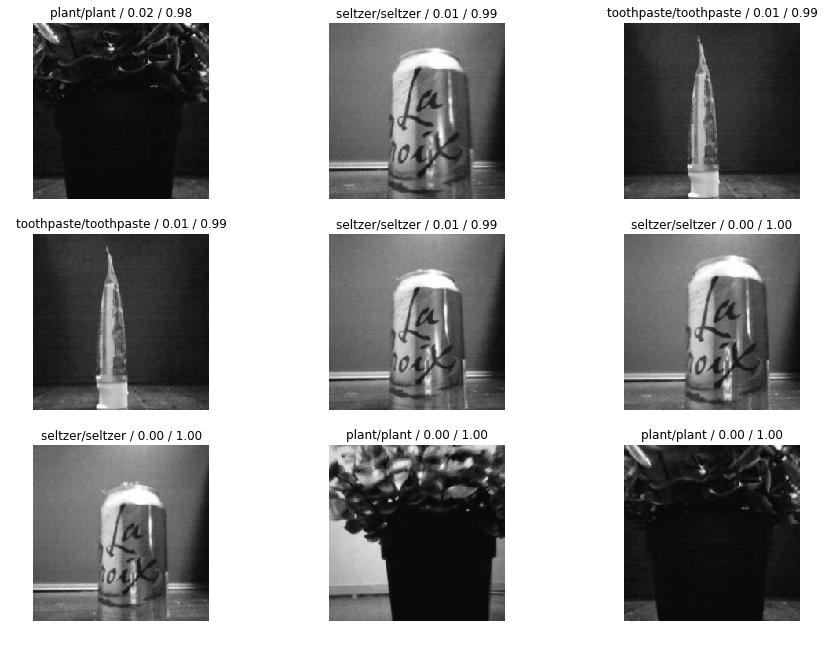

In [22]:
interp.plot_top_losses(9, figsize=(15,11))

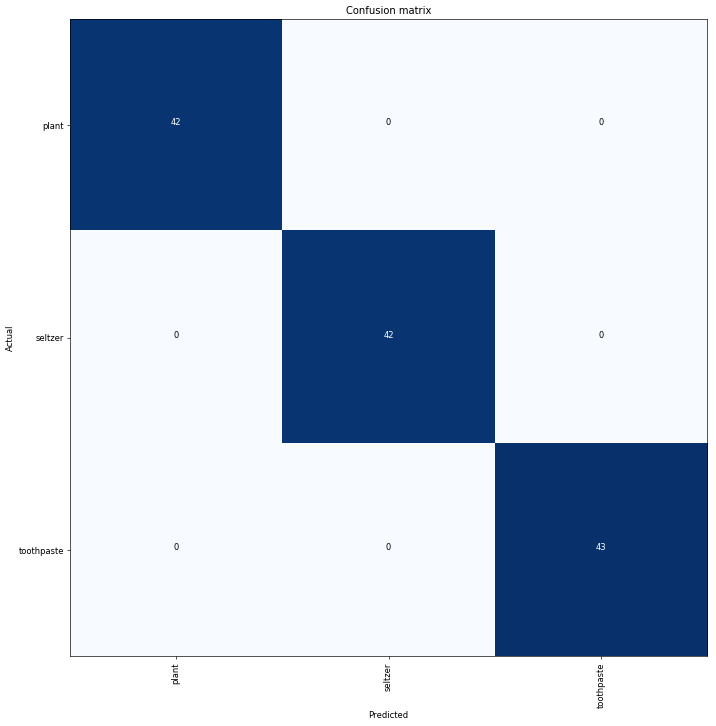

In [23]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [24]:
interp.most_confused(min_val=2)

[]